In [30]:
%matplotlib inline

import warnings
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

# LOAD THE CLEANED DATASET

In [2]:
movies = pd.read_csv('C:/Users/Win Nguyen/Desktop/MSA 550/Gender-Hollywood/movies_test.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       2815 non-null   object 
 1   rating      2813 non-null   object 
 2   genre       2815 non-null   object 
 3   year        2815 non-null   int64  
 4   IMDb_score  2815 non-null   float64
 5   votes       2815 non-null   int64  
 6   director    2815 non-null   object 
 7   d_gender    2815 non-null   int64  
 8   writer      2815 non-null   object 
 9   w_gender    2815 non-null   int64  
 10  star        2815 non-null   object 
 11  s_gender    2815 non-null   int64  
 12  budget      2815 non-null   float64
 13  gross       2814 non-null   float64
 14  company     2815 non-null   object 
 15  runtime     2814 non-null   float64
 16  test_score  2815 non-null   int64  
 17  test_pass   2815 non-null   int64  
dtypes: float64(4), int64(7), object(7)
memory usage: 396.0+ KB


In [3]:
#change company and genre type to categorical instead of object
for col in ['genre','company']:
    movies[col] = movies[col].astype('category')

In [4]:
# see all missing values
movies[movies.isna().any(axis=1)]
#replace the missing values with accurate values

movies.gross = movies.gross.fillna(value = 10000000)
movies.rating = movies.rating.fillna(value = 'R')
movies.runtime = movies.runtime.fillna(value = 120)

# 1. DATA EXPLORATION AND VISUALIZATION

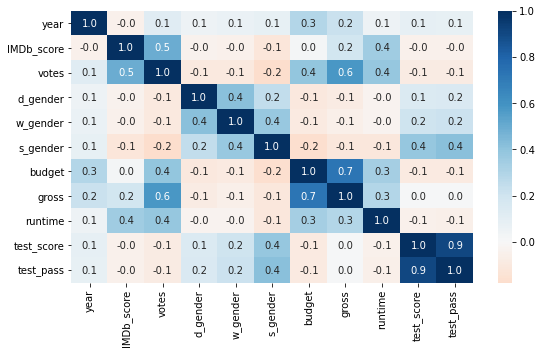

In [5]:
#Dataset Correlation
##MAP the correlation for all numeric variables
corr = movies.corr()
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

## Director Gender visualization

In [6]:
def check_violin_plot(column):
    sns.violinplot(x=movies.d_gender, y=column);

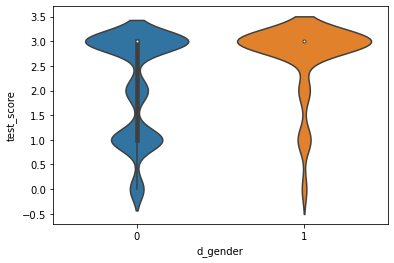

In [7]:
check_violin_plot(movies.test_score)


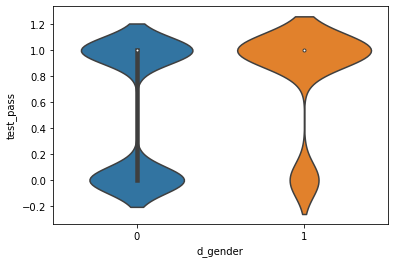

In [8]:
check_violin_plot(movies.test_pass)

In [9]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

C:\Users\Win Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


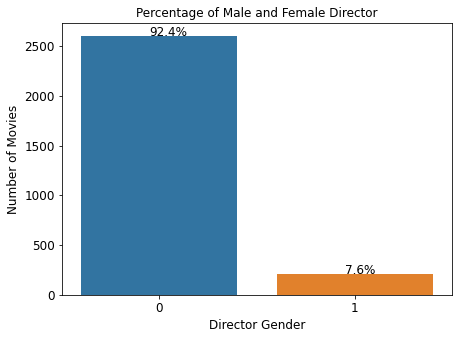

In [10]:
plt.figure(figsize = (7,5))
ax = sns.countplot('d_gender', data = movies)
plt.xticks(size=12)
plt.xlabel('Director Gender', size=12)
plt.ylabel('Number of Movies', size = 12)
plt.title('Percentage of Male and Female Director')
plt.yticks(size=12)

without_hue(ax, movies.d_gender)

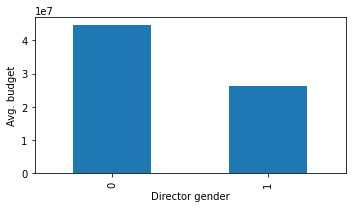

In [11]:
#Budget mean of female vs. male director
ax = movies.groupby('d_gender').mean().budget.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. budget')
ax.set_xlabel('Director gender')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'IMDb_score'}, xlabel='d_gender'>

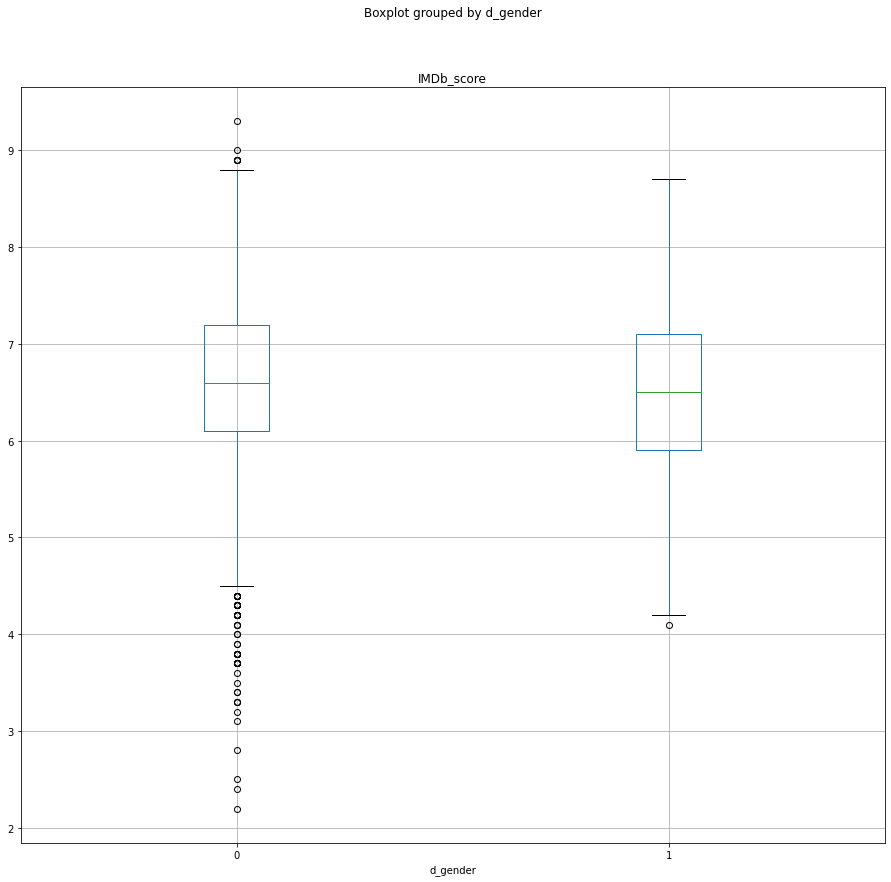

In [12]:
movies.boxplot(column='IMDb_score', by='d_gender', figsize=(15,14))

## Movie Star gender Viz

In [13]:
def check_violin_plot(column):
    sns.violinplot(x=movies.s_gender, y=column);

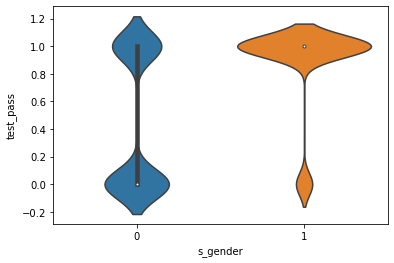

In [14]:
check_violin_plot(movies.test_pass)

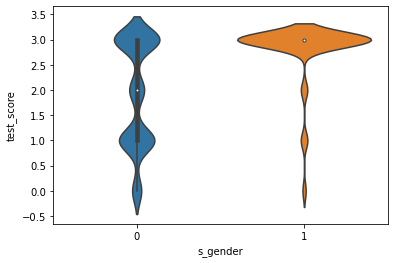

In [15]:
check_violin_plot(movies.test_score)

C:\Users\Win Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


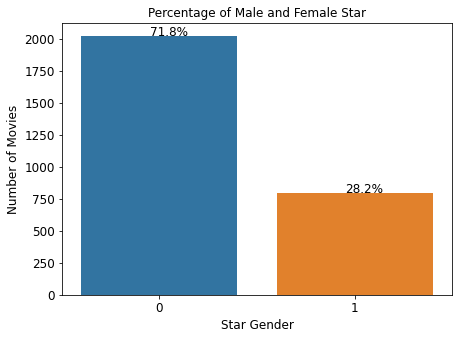

In [16]:
plt.figure(figsize = (7,5))
ax = sns.countplot('s_gender', data = movies)
plt.xticks(size=12)
plt.xlabel('Star Gender', size=12)
plt.ylabel('Number of Movies', size = 12)
plt.title('Percentage of Male and Female Star')
plt.yticks(size=12)

without_hue(ax, movies.d_gender)

## Writer gender viz

In [17]:
def check_violin_plot(column):
    sns.violinplot(x=movies.w_gender, y=column);

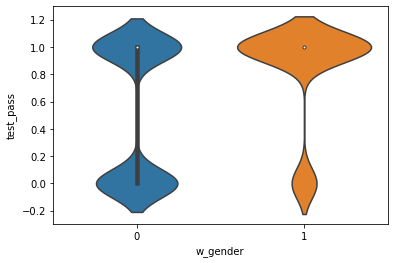

In [18]:
check_violin_plot(movies.test_pass)

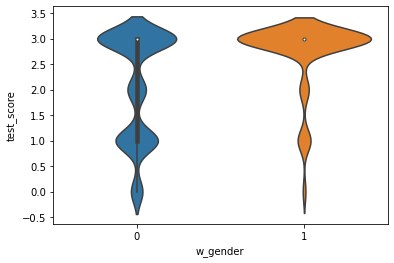

In [19]:
check_violin_plot(movies.test_score)

C:\Users\Win Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


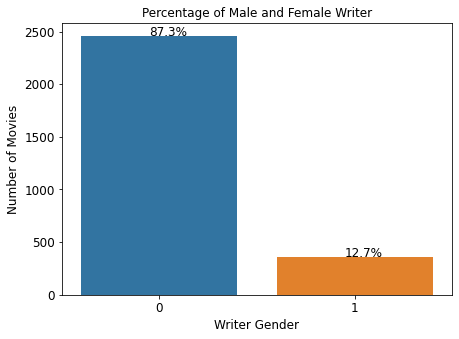

In [20]:
plt.figure(figsize = (7,5))
ax = sns.countplot('w_gender', data = movies)
plt.xticks(size=12)
plt.xlabel('Writer Gender', size=12)
plt.ylabel('Number of Movies', size = 12)
plt.title('Percentage of Male and Female Writer')
plt.yticks(size=12)

without_hue(ax, movies.d_gender)

### Bechdel test exploration

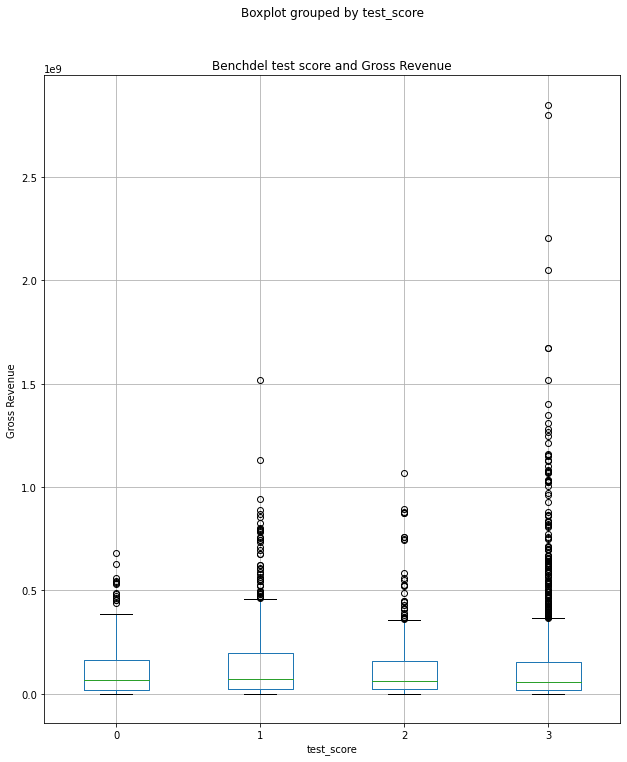

In [21]:
#create boxplot to see the relationship IMDb_score to Benchdel test score
ax = movies.boxplot(column='gross', by='test_score', figsize=(10,12))
ax.set_ylabel('Gross Revenue')  
plt.title('Benchdel test score and Gross Revenue')
plt.show()

### Violin plot to explore the density of Bechdel test score

<AxesSubplot:xlabel='test_score', ylabel='gross'>

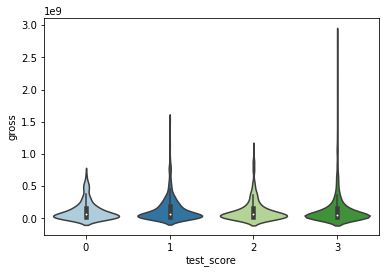

In [22]:
## Gross and Bechdel test score
sns.set_palette('Paired')
sns.violinplot(x=movies.test_score, y=movies.gross)

<AxesSubplot:xlabel='test_score', ylabel='year'>

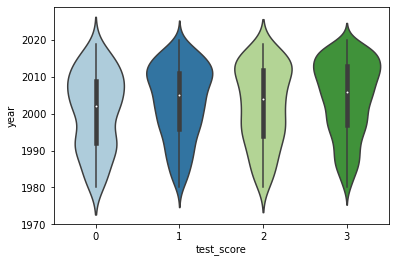

In [23]:
## Test score over year
sns.set_palette('Paired')
sns.violinplot(x=movies.test_score, y=movies.year)

In [24]:
## Movie's gross and Bechdel test pass 
def check_violin_plot(column):
    sns.violinplot(x=movies.test_pass, y=column);

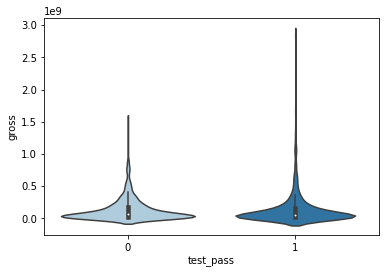

In [25]:
check_violin_plot(movies.gross)

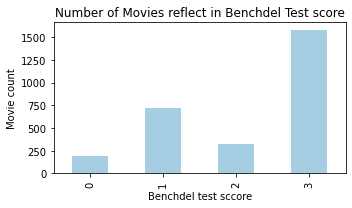

In [26]:
#Number of Movies reflect in Benchdel Test score
ax = movies.groupby('test_score').count().genre.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Movie count')
ax.set_xlabel('Benchdel test sccore')
ax.set_title('Number of Movies reflect in Benchdel Test score')
plt.tight_layout()
plt.show()

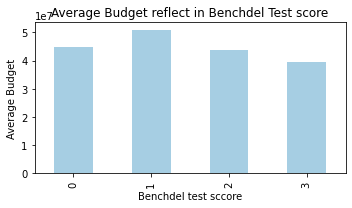

In [27]:
#Average Budget reflect in Benchdel Test score
ax = movies.groupby('test_score').mean().budget.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Average Budget')
ax.set_xlabel('Benchdel test sccore')
ax.set_title('Average Budget reflect in Benchdel Test score')
plt.tight_layout()
plt.show()

# 2. PREDICTIVE MODELS

## 2.1. PREDICTING GROSS REVENUE

Data splitting for all the regression models (MLR, Regression Tree, Random Forrest, Boost Forrest)

In [31]:
train_size=0.6

predictors = ['d_gender', 'w_gender','s_gender','test_score','test_pass','votes','budget']
outcome = 'gross'

X = movies[predictors]
y = movies[outcome] 

# In the first step we will split the data in training and remaining dataset
train_X, rem_X, train_y, rem_y = train_test_split(X,y, train_size=0.6,random_state=1)


test_size = 0.3
valid_X, test_X, valid_y, test_y = train_test_split(rem_X,rem_y, test_size=0.5, random_state=1)

print(train_X.shape)
print(valid_X.shape)
print(test_X.shape)

(1689, 7)
(563, 7)
(563, 7)


### 2.1.1 MULTIPLE LINEAR REGRESSION

In [32]:
###RUNNING MULTIPLE LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [33]:
#SEE THE ATTRIBUTES
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       2815 non-null   object  
 1   rating      2815 non-null   object  
 2   genre       2815 non-null   category
 3   year        2815 non-null   int64   
 4   IMDb_score  2815 non-null   float64 
 5   votes       2815 non-null   int64   
 6   director    2815 non-null   object  
 7   d_gender    2815 non-null   int64   
 8   writer      2815 non-null   object  
 9   w_gender    2815 non-null   int64   
 10  star        2815 non-null   object  
 11  s_gender    2815 non-null   int64   
 12  budget      2815 non-null   float64 
 13  gross       2815 non-null   float64 
 14  company     2815 non-null   category
 15  runtime     2815 non-null   float64 
 16  test_score  2815 non-null   int64   
 17  test_pass   2815 non-null   int64   
dtypes: category(2), float64(4), int64(7), object(5)


In [34]:
#fiting the training set
movies_lm = LinearRegression()
movies_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', movies_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': movies_lm.coef_}))
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# print performance measures on training set
regressionSummary(train_y, movies_lm.predict(train_X))

intercept  -76668484.42085424
    Predictor   coefficient
0    d_gender  3.404918e+06
1    w_gender  9.317723e+06
2    s_gender  5.340874e+06
3  test_score  1.081135e+07
4   test_pass  2.144542e+07
5       votes  3.378080e+02
6      budget  2.884819e+00

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 128479888.8653
            Mean Absolute Error (MAE) : 72325751.5627
          Mean Percentage Error (MPE) : -1363.1221
Mean Absolute Percentage Error (MAPE) : 2544.0573


In [35]:
# predict on validation set
movies_lm_pred = movies_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': movies_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - movies_lm_pred})
print(result.head(10))

# Compute common accuracy measures
regressionSummary(valid_y, movies_lm_pred)


           Predicted          Actual         Residual
1724 130969782.72729 309208309.00000  178238526.27271
965  158169705.63914 113916474.00000  -44253231.63914
1603 236474919.92757  97838349.00000 -138636570.92757
1129 141349134.45337 180630907.00000   39281772.54663
608  536053853.67548 327333559.00000 -208720294.67548
829  233566622.08706  46733235.00000 -186833387.08706
1316 290180002.77000  72178895.00000 -218001107.77000
2742 348182132.62278 173961069.00000 -174221063.62278
282   43352564.03960  13854000.00000  -29498564.03960
2567 237150535.86705  94061311.00000 -143089224.86705

Regression statistics

                      Mean Error (ME) : -3273462.1447
       Root Mean Squared Error (RMSE) : 137399408.8700
            Mean Absolute Error (MAE) : 78907256.8743
          Mean Percentage Error (MPE) : -90.3699
Mean Absolute Percentage Error (MAPE) : 487.5776


0.12788632326820604


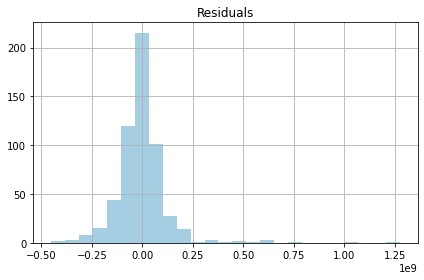

In [36]:
# Plot the Residuals
movies_lm_pred = movies_lm.predict(valid_X)
all_residuals = valid_y - movies_lm_pred

print(len(all_residuals[(all_residuals > -10000000) & (all_residuals < 10000000)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [37]:
## Full Statistic OLS Regression Fit on training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'gross ~ ' + ' + '.join(predictors)

movies_lm_train = sm.ols(formula=formula, data=train_df).fit()
print(movies_lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     409.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -33932.
No. Observations:                1689   AIC:                         6.788e+04
Df Residuals:                    1681   BIC:                         6.792e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.667e+07   1.02e+07     -7.533      0.0

In [38]:
### Use OLS fit train set to predict on the valid set
regressionSummary(valid_y, movies_lm_train.predict(valid_X))

## accuracy on valid set
pred_y_valid = movies_lm.predict(valid_X)
print('adjusted r2 : ', adjusted_r2_score(valid_y,pred_y_valid, movies_lm))


Regression statistics

                      Mean Error (ME) : -3273462.1386
       Root Mean Squared Error (RMSE) : 137399408.8735
            Mean Absolute Error (MAE) : 78907256.8724
          Mean Percentage Error (MPE) : -90.3699
Mean Absolute Percentage Error (MAPE) : 487.5776
adjusted r2 :  0.6288236059826215


#### OTHER REGULARIZATION REGRESSION MODELS

##### LASSO REGRESSION

In [39]:
## Lasso Regression prediction on validation set
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
y_pred1 = lasso.predict(valid_X)
regressionSummary(valid_y, lasso.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -3273456.6947
       Root Mean Squared Error (RMSE) : 137399409.1136
            Mean Absolute Error (MAE) : 78907242.3986
          Mean Percentage Error (MPE) : -90.3704
Mean Absolute Percentage Error (MAPE) : 487.5783


In [40]:
## Lasso coefficient
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = train_X.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

      Columns  Coefficient Estimate
0    d_gender         3404795.95311
1    w_gender         9317646.72558
2    s_gender         5340820.25537
3  test_score        10811633.83132
4   test_pass        21444814.36148
5       votes             337.80780
6      budget               2.88482


##### RIDGE REGRESSION

In [41]:
## Ridge Regression prediction on validation set
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
y_pred2 = ridge.predict(valid_X)
regressionSummary(valid_y, ridge.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 2863431.1286
       Root Mean Squared Error (RMSE) : 157479212.6652
            Mean Absolute Error (MAE) : 84667969.4482
          Mean Percentage Error (MPE) : -1558.0606
Mean Absolute Percentage Error (MAPE) : 1575.8802


In [42]:
## Ridge Regression coefficients
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = train_X.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coef)

      Columns  Coefficient Estimate
0    d_gender        -8087645.20389
1    w_gender         -984089.87769
2    s_gender        -5822422.07022
3  test_score         4671439.14997
4   test_pass        10202179.33689
5       votes             221.96394
6      budget               1.50619


There is not much different in the Regression predicting performance and coefficient between Lasso and Ridge Regression

###### Check the coefficient of all MLR, Lasso, and Ridge Regression

In [43]:
## Linear Regression 
linearRegression = LinearRegression().fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -3273462.1447
       Root Mean Squared Error (RMSE) : 137399408.8700
            Mean Absolute Error (MAE) : 78907256.8743
          Mean Percentage Error (MPE) : -90.3699
Mean Absolute Percentage Error (MAPE) : 487.5776


In [44]:
## Compare coefficents over 3 models
pd.DataFrame({'features': train_X.columns, 'linear regression': linearRegression.coef_, 
              'lasso': lasso.coef_,'ridge': ridge.coef_})

,features,linear regression,lasso,ridge
0,d_gender,3404917.96467,3404795.95311,-8087645.20389
1,w_gender,9317723.08458,9317646.72558,-984089.87769
2,s_gender,5340874.15201,5340820.25537,-5822422.07022
3,test_score,10811346.09118,10811633.83132,4671439.14997
4,test_pass,21445424.64382,21444814.36148,10202179.33689
5,votes,337.80797,337.80780,221.96394
6,budget,2.88482,2.88482,1.50619


### 2.1.2. REGRESSION TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.datasets import load_iris
from sklearn import tree

In [46]:
# use grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
bestClassTree = gridSearch.best_estimator_
bestClassTree
print('Tree has {} nodes'.format(bestClassTree.tree_.node_count))

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 30}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 18}
Tree has 79 nodes


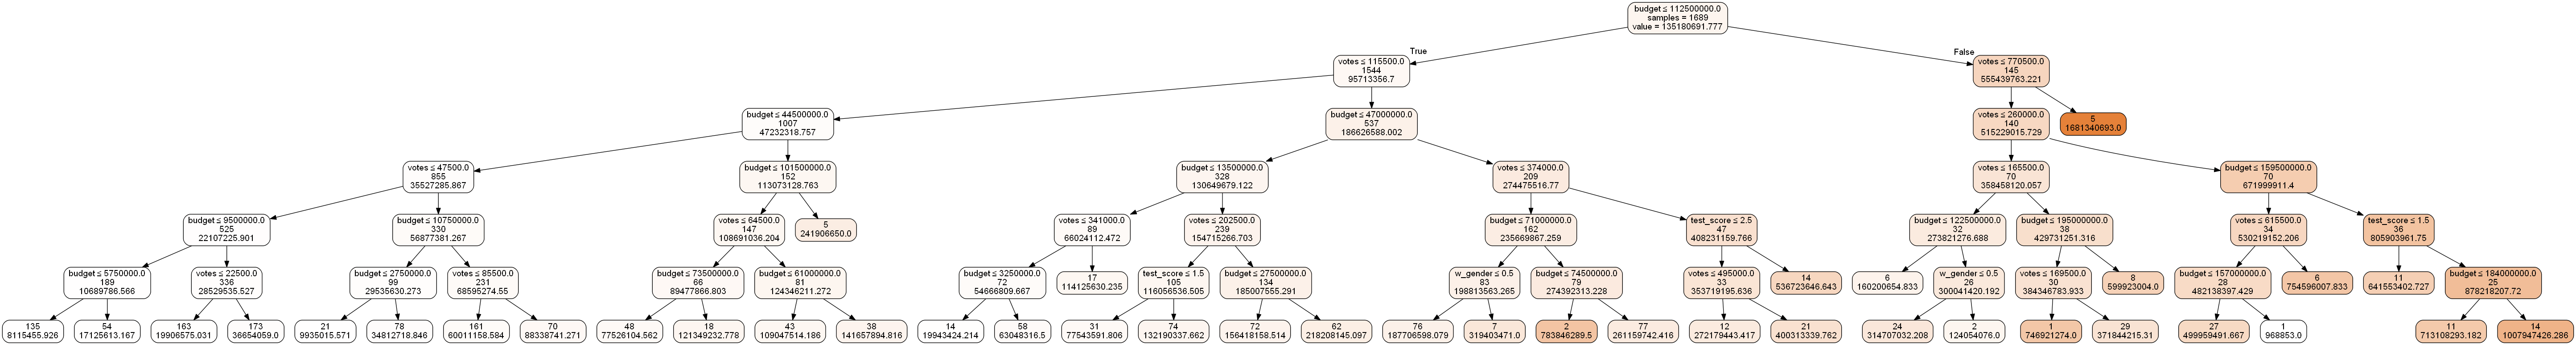

In [47]:
# Plot the improved tree find by Grid Search
plotDecisionTree(bestClassTree, feature_names=train_X.columns)


In [48]:
## Predict on training and validation Regression Tree
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 106494360.0402
            Mean Absolute Error (MAE) : 58149142.8372
          Mean Percentage Error (MPE) : -970.7413
Mean Absolute Percentage Error (MAPE) : 997.6494

Regression statistics

                      Mean Error (ME) : -3627579.3881
       Root Mean Squared Error (RMSE) : 151814894.9360
            Mean Absolute Error (MAE) : 73818547.3486
          Mean Percentage Error (MPE) : -419.5007
Mean Absolute Percentage Error (MAPE) : 448.7854


In [49]:
# Regreesion Tree Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': bestClassTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,features,importance
6,budget,0.63339
5,votes,0.34883
3,test_score,0.01462
1,w_gender,0.00317
0,d_gender,0.00000
2,s_gender,0.00000
4,test_pass,0.00000


### 2.1.3. Random Forest

In [50]:
#Import Libraries
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Fit data and predict
forest = RandomForestRegressor(n_estimators=500, criterion='mse',
                               random_state=1, n_jobs=-1)
forest.fit(train_X, train_y)
y_train_pred = forest.predict(train_X)
y_valid_pred = forest.predict(valid_X)
y_test_pred = forest.predict(test_X)

print('MSE train: %.3f, valid: %.3f, test: %.3f' % (mean_squared_error(train_y, y_train_pred),
                                                 mean_squared_error(valid_y, y_valid_pred),
                                                mean_squared_error(test_y, y_test_pred)))
                                      
print('R^2 train: %.3f, valid: %.3f, test: %.3f ' % (r2_score(train_y, y_train_pred),
                                       r2_score(valid_y, y_valid_pred),
                                        r2_score(test_y, y_test_pred)))
                                        



MSE train: 2293713399713427.500, valid: 16261207812760956.000, test: 14885891980432932.000
R^2 train: 0.949, valid: 0.684, test: 0.678 


      feature  importance     std
0    d_gender     0.00223 0.00204
1    w_gender     0.00747 0.00411
4   test_pass     0.00978 0.00802
2    s_gender     0.01060 0.00648
3  test_score     0.02453 0.01084
5       votes     0.34434 0.06090
6      budget     0.60105 0.06136


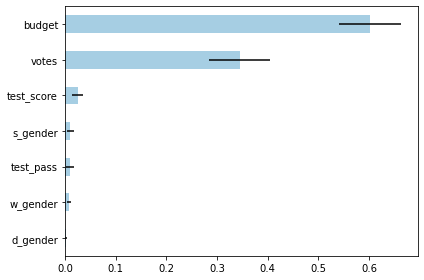

In [51]:
#variable importance plot
rf = RandomForestRegressor(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

### 2.1.4 Gradient Boosting Forest

In [52]:
#Fit and predict data
boost = GradientBoostingRegressor(n_estimators=500, criterion='mse',
                               random_state=1)
boost.fit(train_X, train_y)
y_train_pred = boost.predict(train_X)
y_valid_pred = boost.predict(valid_X)
y_test_pred = boost.predict(test_X)

print('MSE train: %.3f, valid: %.3f, test: %.3f' % (mean_squared_error(train_y, y_train_pred),
                                                 mean_squared_error(valid_y, y_valid_pred),
                                                mean_squared_error(test_y, y_test_pred)))
                                      
print('R^2 train: %.3f, valid: %.3f, test: %.3f ' % (r2_score(train_y, y_train_pred),
                                       r2_score(valid_y, y_valid_pred),
                                        r2_score(test_y, y_test_pred)))

MSE train: 2819591933833490.000, valid: 21870668344382152.000, test: 21652223615612604.000
R^2 train: 0.937, valid: 0.575, test: 0.532 


##### Comparing the predictive models on testing set

#### MLR with OLS

In [53]:
### Predict on the test set
regressionSummary(test_y, movies_lm_train.predict(test_X))

## accuracy on test set
pred_y_test = movies_lm.predict(test_X)
print('adjusted r2 : ', adjusted_r2_score(test_y,pred_y_test, movies_lm))


Regression statistics

                      Mean Error (ME) : -3170749.7720
       Root Mean Squared Error (RMSE) : 127611942.1670
            Mean Absolute Error (MAE) : 72336207.4812
          Mean Percentage Error (MPE) : -618.8399
Mean Absolute Percentage Error (MAPE) : 1574.3371
adjusted r2 :  0.6437759118769886


#### Lasso Regularization

In [54]:
## Lasso Regression prediction on testing set
y_pred1 = lasso.predict(test_X)
regressionSummary(test_y, lasso.predict(test_X))
print('adjusted r2 : ', adjusted_r2_score(test_y,y_pred1, movies_lm))


Regression statistics

                      Mean Error (ME) : -3170758.8414
       Root Mean Squared Error (RMSE) : 127611935.1481
            Mean Absolute Error (MAE) : 72336189.6516
          Mean Percentage Error (MPE) : -618.8406
Mean Absolute Percentage Error (MAPE) : 1574.3353
adjusted r2 :  0.6437759510780778


#### Ridge Regularization

In [55]:
## Ridge Regression prediction on testing set
y_pred2 = ridge.predict(test_X)
regressionSummary(test_y, ridge.predict(test_X))
print('adjusted r2 : ', adjusted_r2_score(valid_y,y_pred2, movies_lm))


Regression statistics

                      Mean Error (ME) : -980584.4005
       Root Mean Squared Error (RMSE) : 144430773.2953
            Mean Absolute Error (MAE) : 78951349.8980
          Mean Percentage Error (MPE) : -3904.5125
Mean Absolute Percentage Error (MAPE) : 3921.2615
adjusted r2 :  -0.2675881415333561


#### Regression Tree

In [56]:
## Predict testing set Regression Tree
regressionSummary(test_y, regTree.predict(test_X))


Regression statistics

                      Mean Error (ME) : -4417910.9264
       Root Mean Squared Error (RMSE) : 142138691.2718
            Mean Absolute Error (MAE) : 71074459.0473
          Mean Percentage Error (MPE) : -1211.0039
Mean Absolute Percentage Error (MAPE) : 1238.6187


#### Random forest and Gradient Boost forest prediction on testing set is appeared above

Random forest performance on testing set: 
- MSE: 14885891980432932.000
- R^2: 0.678

Gradient boost forest on testing set:
- MSE: 21652223615612604.000
- R^2: 0.532 

### 2.1.5. KNN Alogirthm

##### Predict a new movie's gross revenue, The actual movie is Eternals, has gross revenue of: $300,000,000

In [60]:
import math
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pylab as plt

In [61]:
train_df = [train_X, train_y]
valid_df = [valid_X, valid_y]
test_df = [test_X, test_y]


In [62]:
# transform the data into scaler for KNN
outcome = 'gross'
predictors = ['d_gender', 'w_gender','s_gender','test_score','test_pass','votes','budget']



scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training validation and newCustomer
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_X = pd.DataFrame(test_X, columns=['d_gender', 'w_gender','s_gender','test_score','test_pass','votes','budget'])
test_y = pd.DataFrame(test_y, columns=['gross'])

TypeError: list indices must be integers or slices, not list

In [63]:
# Train a regressor for different values of k
# Classification use accuracy as a threshold for number of k, prediction use RMSE 
results = []
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'RMSE': math.sqrt(mean_squared_error(valid_y, knn.predict(valid_X)))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,RMSE
0,1,166292504.27219
1,2,148625293.43340
2,3,144357925.47292
3,4,149754036.44973
4,5,152154603.88472
5,6,152434321.00659
6,7,154586728.29325
7,8,156108421.68467
8,9,155691556.76874
9,10,154378250.56678


Choose k = 6

In [64]:
# new movie
newmovie = pd.DataFrame([{'d_gender':1 , 's_gender': 1, 'w_gender': 0, 'test_score': 3, 'test_pass': 1, 'votes': 114000, 'budget': 200000000}],
                       columns=['d_gender', 'w_gender','s_gender','test_score','test_pass','votes','budget'])
newmovie

,d_gender,w_gender,s_gender,test_score,test_pass,votes,budget
0,1,0,1,3,1,114000,200000000


In [65]:
# train knn model with k=15
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=6)

In [66]:
# predict value of new tract
knn.predict(newmovie)

array([6.7912538e+08])

## 2.2. PREDICT IMDb_SCORE

Splitting the dataset into three sets: training (60%), validating (20%), testing (20%)

In [67]:
train_size=0.6

predictors = ['d_gender','w_gender','s_gender','test_score','test_pass','budget']
outcome = 'IMDb_score'

X = movies[predictors]
y = movies[outcome] 

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6,random_state=1)


test_size = 0.3
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1689, 6)
(1689,)
(563, 6)
(563,)
(563, 6)
(563,)


(None, None)

### 2.2.1. MULTIPLE LINEAR REGRESSION

In [68]:
###The code for fiting the training set
movies_lm_sc = LinearRegression()
movies_lm_sc.fit(X_train, y_train)

# print coefficients
print('intercept ', movies_lm_sc.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': movies_lm_sc.coef_}))
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# print performance measures
regressionSummary(y_train, movies_lm_sc.predict(X_train))

intercept  6.65815370296843
    Predictor  coefficient
0    d_gender     -0.04352
1    w_gender      0.01302
2    s_gender     -0.20667
3  test_score     -0.02218
4   test_pass      0.02646
5      budget     -0.00000

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.9019
            Mean Absolute Error (MAE) : 0.7040
          Mean Percentage Error (MPE) : -2.2605
Mean Absolute Percentage Error (MAPE) : 11.6041


In [69]:
# predict on validation set
movies_lm_pred_sc = movies_lm_sc.predict(X_valid)

result_sc = pd.DataFrame({'Predicted': movies_lm_pred_sc, 'Actual': y_valid,
                       'Residual': y_valid - movies_lm_pred_sc})
print(result_sc.head(10))

# Compute common accuracy measures
regressionSummary(y_valid, movies_lm_pred_sc)

      Predicted  Actual  Residual
1724    6.61233 7.60000   0.98767
965     6.42216 5.70000  -0.72216
1603    6.63094 5.60000  -1.03094
1129    6.65513 5.50000  -1.15513
608     6.63431 8.60000   1.96569
829     6.42064 6.30000  -0.12064
1316    6.64346 5.90000  -0.74346
2742    6.41838 5.60000  -0.81838
282     6.61706 5.40000  -1.21706
2567    6.63094 5.70000  -0.93094

Regression statistics

                      Mean Error (ME) : 0.0078
       Root Mean Squared Error (RMSE) : 0.8688
            Mean Absolute Error (MAE) : 0.6661
          Mean Percentage Error (MPE) : -1.9917
Mean Absolute Percentage Error (MAPE) : 10.9547


In [70]:
## Inpsect predictors coefficient on the training set using OLS regression
train_df_sc = X_train.join(y_train)

predictors = X_train.columns
formula = 'IMDb_score ~ ' + ' + '.join(predictors)

movies_lm_ols = sm.ols(formula=formula, data=train_df_sc).fit()
print(movies_lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             IMDb_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.356
Date:                Fri, 10 Dec 2021   Prob (F-statistic):            0.00272
Time:                        16:57:00   Log-Likelihood:                -2222.2
No. Observations:                1689   AIC:                             4458.
Df Residuals:                    1682   BIC:                             4496.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6582      0.070     95.192      0.0

In [71]:
## Predict on the valid set
regressionSummary(y_valid, movies_lm_ols.predict(X_valid))
## accuracy on valid set
pred_valid_y = movies_lm_ols.predict(X_valid)
print('adjusted r2 : ', adjusted_r2_score(y_valid,pred_valid_y, movies_lm_sc))


Regression statistics

                      Mean Error (ME) : 0.0078
       Root Mean Squared Error (RMSE) : 0.8688
            Mean Absolute Error (MAE) : 0.6661
          Mean Percentage Error (MPE) : -1.9917
Mean Absolute Percentage Error (MAPE) : 10.9547
adjusted r2 :  0.0020796000052282215


##### OTHER REGULARIZATION REGRESSION MODELS

##### LASSO REGULARIZATION

In [72]:

lasso = Lasso(normalize=True, alpha=1)
lasso.fit(X_train, y_train)
y_pred3 = lasso.predict(X_valid)
regressionSummary(y_valid, lasso.predict(X_valid))




Regression statistics

                      Mean Error (ME) : 0.0108
       Root Mean Squared Error (RMSE) : 0.8745
            Mean Absolute Error (MAE) : 0.6722
          Mean Percentage Error (MPE) : -1.9647
Mean Absolute Percentage Error (MAPE) : 11.0393


##### RIDGE REGUARIZATION

In [73]:
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(X_train, y_train)
y_pred4 = ridge.predict(X_valid)
regressionSummary(y_valid, ridge.predict(X_valid))



Regression statistics

                      Mean Error (ME) : 0.0095
       Root Mean Squared Error (RMSE) : 0.8707
            Mean Absolute Error (MAE) : 0.6674
          Mean Percentage Error (MPE) : -1.9751
Mean Absolute Percentage Error (MAPE) : 10.9708


In [74]:
## Linear Regression 
linearRegression = LinearRegression().fit(X_train, y_train)
regressionSummary(y_valid, linearRegression.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 0.0078
       Root Mean Squared Error (RMSE) : 0.8688
            Mean Absolute Error (MAE) : 0.6661
          Mean Percentage Error (MPE) : -1.9917
Mean Absolute Percentage Error (MAPE) : 10.9547


In [75]:
## Compare coefficents over 3 models
pd.DataFrame({'features': X_train.columns, 'linear regression': linearRegression.coef_, 
              'lasso': lasso.coef_,'ridge': ridge.coef_})

,features,linear regression,lasso,ridge
0,d_gender,-0.04352,-0.00000,-0.03327
1,w_gender,0.01302,-0.00000,-0.01939
2,s_gender,-0.20667,-0.00000,-0.09369
3,test_score,-0.02218,-0.00000,-0.01010
4,test_pass,0.02646,-0.00000,-0.01868
5,budget,-0.00000,0.00000,0.00000


### 2.2.2 REGRESSION TREE

In [76]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
bestClassTree = gridSearch.best_estimator_
bestClassTree
print('Tree has {} nodes'.format(bestClassTree.tree_.node_count))

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.007, 'min_samples_split': 16}
Tree has 3 nodes


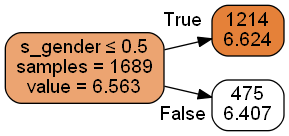

In [77]:
# Plot the improved tree find by Grid Search
plotDecisionTree(bestClassTree, feature_names=X_train.columns)
plotDecisionTree(bestClassTree, feature_names=X_train.columns, rotate=True)

In [78]:
regressionSummary(y_train, bestClassTree.predict(X_train))
regressionSummary(y_valid, bestClassTree.predict(X_valid))
#regressionSummary(y_test, bestClassTree.predict(X_test))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9020
            Mean Absolute Error (MAE) : 0.7035
          Mean Percentage Error (MPE) : -2.2609
Mean Absolute Percentage Error (MAPE) : 11.5967

Regression statistics

                      Mean Error (ME) : 0.0076
       Root Mean Squared Error (RMSE) : 0.8682
            Mean Absolute Error (MAE) : 0.6662
          Mean Percentage Error (MPE) : -1.9918
Mean Absolute Percentage Error (MAPE) : 10.9529


In [79]:
# Variable importance
importance = pd.DataFrame({'features': X_train.columns, 
                           'importance': bestClassTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,features,importance
2,s_gender,1.00000
0,d_gender,0.00000
1,w_gender,0.00000
3,test_score,0.00000
4,test_pass,0.00000
5,budget,0.00000


### 2.2.3. Random Forest

      feature  importance     std
2    s_gender     0.02978 0.01620
4   test_pass     0.03665 0.01405
0    d_gender     0.04210 0.01248
1    w_gender     0.05689 0.01335
3  test_score     0.12833 0.02700
5      budget     0.70625 0.03557


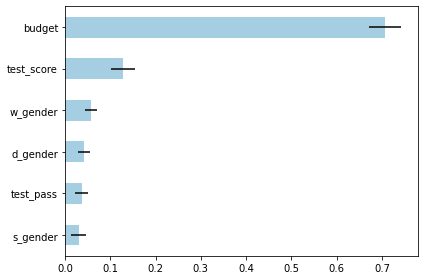

In [80]:
#variable importance plot
rf = RandomForestRegressor(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [81]:
forest_sc = RandomForestRegressor(n_estimators=500, criterion='mse',
                               random_state=1, n_jobs=-1)
forest_sc.fit(X_train, y_train)
y_train_pred = forest_sc.predict(X_train)
y_valid_pred = forest_sc.predict(X_valid)
y_test_pred = forest_sc.predict(X_test)

print('MSE train: %.3f, valid: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                                 mean_squared_error(y_valid, y_valid_pred),
                                                mean_squared_error(y_test, y_test_pred)))
                                      
print('R^2 train: %.3f, valid: %.3f, test: %.3f ' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_valid, y_valid_pred),
                                        r2_score(y_test, y_test_pred)))

MSE train: 0.486, valid: 0.877, test: 0.954
R^2 train: 0.409, valid: -0.148, test: -0.173 


### 2.2.4 Gradient Boost Forest

In [82]:
#Fit and predict data
boost = GradientBoostingRegressor(n_estimators=500, criterion='mse',
                               random_state=1)
boost.fit(X_train, y_train)
y_train_pred = boost.predict(X_train)
y_valid_pred = boost.predict(X_valid)
y_test_pred = boost.predict(X_test)

print('MSE train: %.3f, valid: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                                 mean_squared_error(y_valid, y_valid_pred),
                                                mean_squared_error(y_test, y_test_pred)))
                                      
print('R^2 train: %.3f, valid: %.3f, test: %.3f ' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_valid, y_valid_pred),
                                        r2_score(y_test, y_test_pred)))

MSE train: 0.605, valid: 0.807, test: 0.871
R^2 train: 0.265, valid: -0.056, test: -0.071 


##### Comparing the predictive models on testing set

#### MLR with OLS

In [83]:
## Predict on the test set
regressionSummary(y_test, movies_lm_ols.predict(X_test))
## accuracy on test set
pred_test_y = movies_lm_ols.predict(X_test)
print('adjusted r2 : ', adjusted_r2_score(y_valid,pred_test_y, movies_lm_sc))


Regression statistics

                      Mean Error (ME) : 0.0292
       Root Mean Squared Error (RMSE) : 0.8929
            Mean Absolute Error (MAE) : 0.6988
          Mean Percentage Error (MPE) : -1.7045
Mean Absolute Percentage Error (MAPE) : 11.3267
adjusted r2 :  -0.0286143288500611


#### Lasso Regularization

In [84]:
y_pred3 = lasso.predict(X_test)
regressionSummary(y_test, lasso.predict(X_test))
print('adjusted r2 : ', adjusted_r2_score(y_test,y_pred3, movies_lm_sc))


Regression statistics

                      Mean Error (ME) : 0.0247
       Root Mean Squared Error (RMSE) : 0.9023
            Mean Absolute Error (MAE) : 0.7055
          Mean Percentage Error (MPE) : -1.8054
Mean Absolute Percentage Error (MAPE) : 11.4391
adjusted r2 :  -0.011548743881144574


#### Ridge Regularization

In [85]:
y_pred4 = ridge.predict(X_test)
regressionSummary(y_test, ridge.predict(X_test))
print('adjusted r2 : ', adjusted_r2_score(y_test,y_pred4, movies_lm_sc))


Regression statistics

                      Mean Error (ME) : 0.0272
       Root Mean Squared Error (RMSE) : 0.8956
            Mean Absolute Error (MAE) : 0.7013
          Mean Percentage Error (MPE) : -1.7480
Mean Absolute Percentage Error (MAPE) : 11.3671
adjusted r2 :  0.0034906607926351585


#### Regression Tree

In [86]:
regressionSummary(y_test, bestClassTree.predict(X_test))


Regression statistics

                      Mean Error (ME) : 0.0288
       Root Mean Squared Error (RMSE) : 0.8928
            Mean Absolute Error (MAE) : 0.6987
          Mean Percentage Error (MPE) : -1.7106
Mean Absolute Percentage Error (MAPE) : 11.3254


#### Ensemble methods

Random forest performance on testing set:
- MSE train: 0.954
- R^2 train: -0.173

Gradient boost forest on testing set:
- MSE train: 0.871
- R^2 train: -0.071 

### 2.2.5 KNN Model

Use KNN algorithm to predict a new record

In [87]:
import math
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pylab as plt

In [88]:
train_df = [X_train, y_train]
valid_df = [X_valid, y_valid]
test_df = [X_test, y_test]

##### Predict a new movie's IMDb_score: the movie name is Eternals, actual IMDb_score is 6.8

In [89]:
# normalize training and validation sets. The transformation is trained using the training set only.
# if you don't convert the integer columns to real numbers (float64), the StandardScaler will raise a DataConversionWarning. 
# This is expected
outcome = 'IMDb_score'
predictors = ['d_gender', 'w_gender','s_gender','test_score','test_pass','budget']



scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training validation and newCustomer
X_train = scaler.transform(train_df[predictors])
y_train = train_df[outcome]
X_valid = scaler.transform(valid_df[predictors])
y_valid = valid_df[outcome]
X_test = pd.DataFrame(X_test, columns=['d_gender', 'w_gender','s_gender','test_score','test_pass','budget'])
y_test = pd.DataFrame(y_test, columns=['IMDb_score'])

TypeError: list indices must be integers or slices, not list

In [90]:
# Train a regressor for different values of k
# Classification use accuracy as a threshold for number of k, prediction use RMSE 
results = []
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'RMSE': math.sqrt(mean_squared_error(y_valid, knn.predict(X_valid)))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,RMSE
0,1,1.25102
1,2,1.09654
2,3,1.00305
3,4,0.94424
4,5,0.92099
5,6,0.91764
6,7,0.90938
7,8,0.91382
8,9,0.89914
9,10,0.89644


choose k=6

In [91]:
#Predict a new record
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       2815 non-null   object  
 1   rating      2815 non-null   object  
 2   genre       2815 non-null   category
 3   year        2815 non-null   int64   
 4   IMDb_score  2815 non-null   float64 
 5   votes       2815 non-null   int64   
 6   director    2815 non-null   object  
 7   d_gender    2815 non-null   int64   
 8   writer      2815 non-null   object  
 9   w_gender    2815 non-null   int64   
 10  star        2815 non-null   object  
 11  s_gender    2815 non-null   int64   
 12  budget      2815 non-null   float64 
 13  gross       2815 non-null   float64 
 14  company     2815 non-null   category
 15  runtime     2815 non-null   float64 
 16  test_score  2815 non-null   int64   
 17  test_pass   2815 non-null   int64   
dtypes: category(2), float64(4), int64(7), object(5)


In [92]:
# new movie
newmovie = pd.DataFrame([{ 'd_gender':1 , 's_gender': 1, 'w_gender': 0, 'test_score': 3, 'test_pass': 1, 'budget': 200000000}],
                       columns=['d_gender', 'w_gender','s_gender','test_score','test_pass','budget'])
newmovie


,d_gender,w_gender,s_gender,test_score,test_pass,budget
0,1,0,1,3,1,200000000


In [93]:
# train knn model with k=15
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [94]:
# predict value of new movie
knn.predict(newmovie)

array([7.1125])